# Project Initialization: Analysis of Life Expectancy and GDP

## Project Overview

This project, part of the Codecademy Data Science Career Path, focuses on data visualization. We will analyze data on Gross Domestic Product (GDP) and life expectancy from the World Health Organization and the World Bank. GDP is the total monetary value of all goods and services produced within a country, while life expectancy is the average number of years a person is expected to live. The primary objective is to explore the relationship between GDP and life expectancy across six countries. This analysis involves rigorous data preparation, visualization, and hypothesis testing. 

## Project Objectives

- **Portfolio Development**: Complete a comprehensive data science project to enhance our portfolio.
- **Visualization Skills**: Utilize Seaborn and Matplotlib to generate insightful visualizations.
- **Presentation**: Develop expertise in presenting and sharing data visualizations effectively.
- **Data Analysis**: Preprocess, explore, and analyze the dataset to derive meaningful insights.

## Prerequisites

- **Data Acquisition**: Proficiency in obtaining and verifying data from reliable sources.
- **Data Visualization**: Advanced skills in creating visual representations of data using Python libraries.
- **Hypothesis Testing**: Competency in testing hypotheses and interpreting statistical outcomes.
- **Quantitative Data Summary**: Ability to summarize and interpret quantitative data accurately.
- **Data Wrangling**: Expertise in cleaning and structuring data for analysis.
- **Pandas for Data Manipulation**: Strong command of the Pandas library for efficient data manipulation.


# Project Scoping

## Project Goals

The primary objective of this project is to explore the relationship between Gross Domestic Product (GDP) and life expectancy across six countries. We aim to identify patterns and correlations between these variables to draw conclusions regarding economic development and public health. The focus will be on understanding whether higher GDP is associated with longer life expectancy.

## Data Requirements

- **Dataset**: The dataset named `all_data.csv` will be utilized, containing data sourced from the World Health Organization (WHO) and the World Bank.
- **Data Fields**:
  - **Country**: The six countries being studied.
  - **Year**: The time span of data collection, covering multiple years to observe trends.
  - **GDP**: The Gross Domestic Product values for each country during the specified periods.
  - **Life Expectancy**: The average life expectancy at birth for each country during the same periods.


## Analytical Methods

1. **Data Cleaning and Preprocessing**:
   - Handle missing data, outliers, and inconsistencies to ensure data integrity.
   - Normalize GDP values, potentially converting to GDP per capita for comparability.

   ---
   
2. **Exploratory Data Analysis (EDA)**:
   - Conduct descriptive statistical analysis.
   - Visualize GDP and life expectancy distributions to identify trends.

   ---

3. **Correlation Analysis**:
   - Calculate correlation coefficients between GDP and life expectancy.
   - Conduct hypothesis testing to determine the statistical significance of observed correlations.

   ---

4. **Visualization**:
   - Use Seaborn and Matplotlib to create scatter plots, line graphs, and other visualizations that demonstrate the relationship between GDP and life expectancy.

   ---

5. **Conclusion and Reporting**:
   - Summarize the findings in a detailed report.
   - Prepare a blog post to communicate the results to a broader audience, including stakeholders at the World Health Organization.


## Constraints and Considerations

- **Data Availability**: Verify that data for all six countries is complete and consistent over the chosen time periods.
- **Comparability**: Ensure consistency in the economic and health indicators across countries to allow for meaningful comparisons.
- **Statistical Rigor**: Ensure that the findings are statistically sound and reflect real-world implications.

Following this structured approach will enable us to conduct a thorough analysis, providing valuable insights into the relationship between GDP and life expectancy.

# Load the Data

In this section, we will load the dataset provided in the `all_data.csv` file using the `pandas` library. This dataset includes information on GDP and life expectancy across various countries.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('all_data.csv')

# Display the first few rows of the dataset
print(data.head())
data.shape

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


(96, 4)

- **Country**: The dataset focuses on Chile for these observations.
- **Year**: The data covers the years 2000 to 2004.
- **Life Expectancy at Birth (years)**: Life expectancy in Chile increased slightly from 77.3 years in 2000 to 78.0 years in 2004.
- **GDP**: The Gross Domestic Product shows fluctuations, starting at approximately 77.86 billion dollars in 2000 and reaching around $99.21 billion dollars in 2004.



# Explore and Explain Data

Now that we have loaded the data, it is important to explore and understand its characteristics. We will start by calculating summary statistics and creating visualizations to examine the trends and relationships in the data.

### Key Questions to Explore:

- **Has life expectancy increased over time in the six nations?**
- **Has GDP increased over time in the six nations?**
- **Is there a correlation between GDP and life expectancy of a country?**
- **What is the average life expectancy in these nations?**
- **What is the distribution of that life expectancy?**

By answering these questions through analysis and visualizations, we will gain deeper insights into the data.


### Data Preparation: Renaming Columns and Computing Averages

Before analyzing the data, it's necessary to address some inconsistencies in the column names. For instance, the column name `Life expectancy at birth (years)` is descriptive but can be cumbersome when coding. We will rename this column to `LEABY` for simplicity.

After renaming, we will calculate the average `LEABY` and `GDP` for each country. This will give us a clearer understanding of the data distribution and help in the subsequent analysis.


In [2]:
import pandas as pd

# Renaming the 'Life expectancy at birth (years)' column to 'LEABY'
data = data.rename(columns={"Life expectancy at birth (years)": "LEABY"})

# Compute the average LEABY and GDP by country
dfMeans = data.drop("Year", axis=1).groupby("Country").mean().reset_index()

# Display the modified dataframe
print(dfMeans.head())

                    Country     LEABY           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13


### Visualizing Average LEABY and GDP by Country

Now that the data has been grouped by `Country` and the average values for `LEABY` (Life Expectancy at Birth) and `GDP` have been computed, we can create bar plots to visualize these averages.

The first plot below shows the average Life Expectancy for each country.

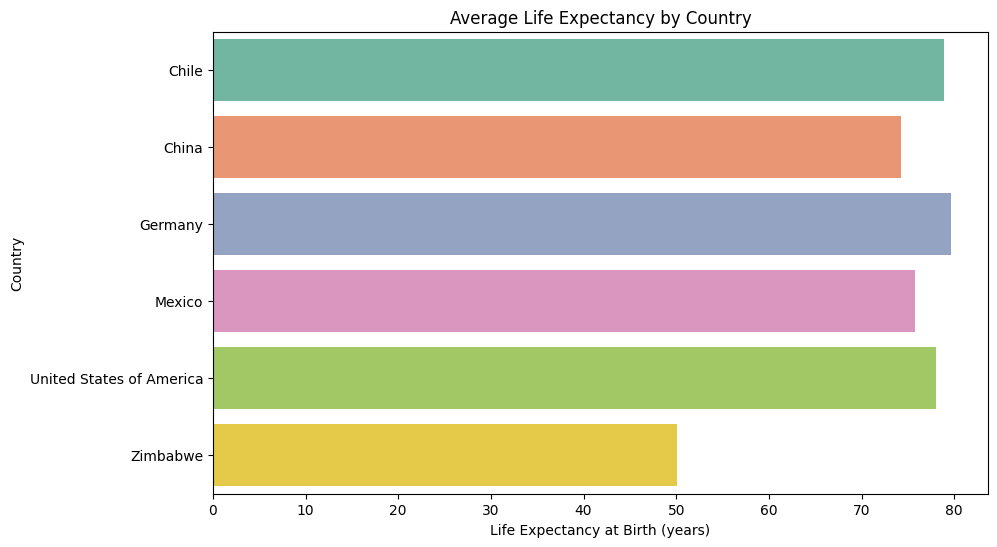

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot showing the average Life Expectancy by country
plt.figure(figsize=(10, 6))
sns.barplot(x="LEABY", y="Country", data=dfMeans, hue="Country", dodge=False, palette="Set2")  
plt.title('Average Life Expectancy by Country')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Country')
plt.legend([],[], frameon=False)  
plt.show()


**Average Life Expectancy by Country**:
   - This plot indicates that most countries have a high average life expectancy, ranging from the mid-70s to 80 years. Zimbabwe, however, has a significantly lower life expectancy, around 50 years, which reflects potential health and socio-economic challenges.

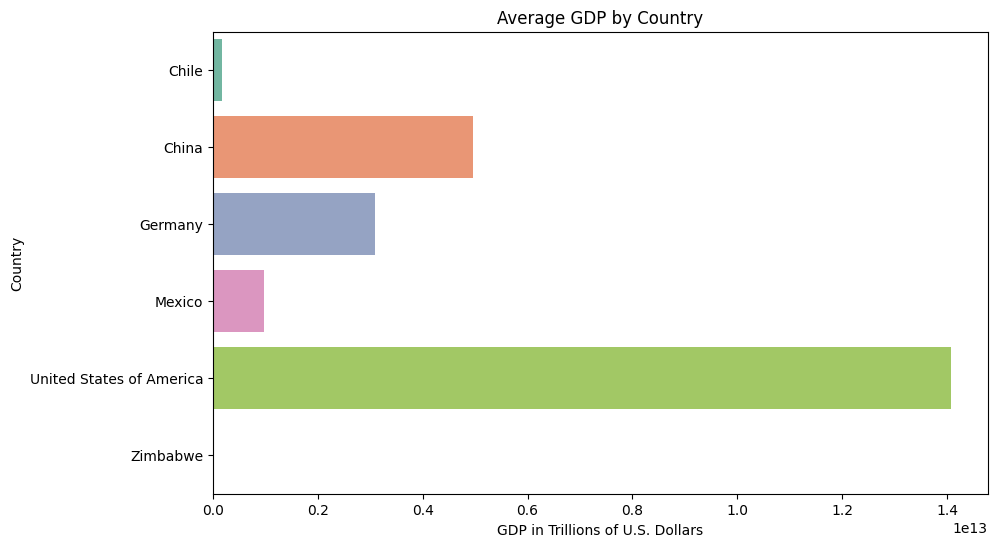

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot showing the average GDP by country 
plt.figure(figsize=(10, 6))
sns.barplot(x="GDP", y="Country", data=dfMeans, hue="Country", dodge=False, palette="Set2")
plt.title('Average GDP by Country')
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.ylabel('Country')
plt.legend([],[], frameon=False) 
plt.show()


**Average GDP by Country**:
   - The bar plot shows that the United States has the highest average GDP by a significant margin compared to the other five countries. China follows, with Germany and Mexico showing moderate GDPs. Chile and Zimbabwe have the lowest GDPs, with Zimbabwe being notably lower than the others.

## Analyze Each Question

### Has Life Expectancy Increased Over Time in the Six Nations?

To determine if life expectancy has increased over time in the six nations, we can use the following visualizations:

**Line Charts**: Line charts are ideal for showing trends over time. By plotting life expectancy against time for each country, we can observe changes in life expectancy over the years.


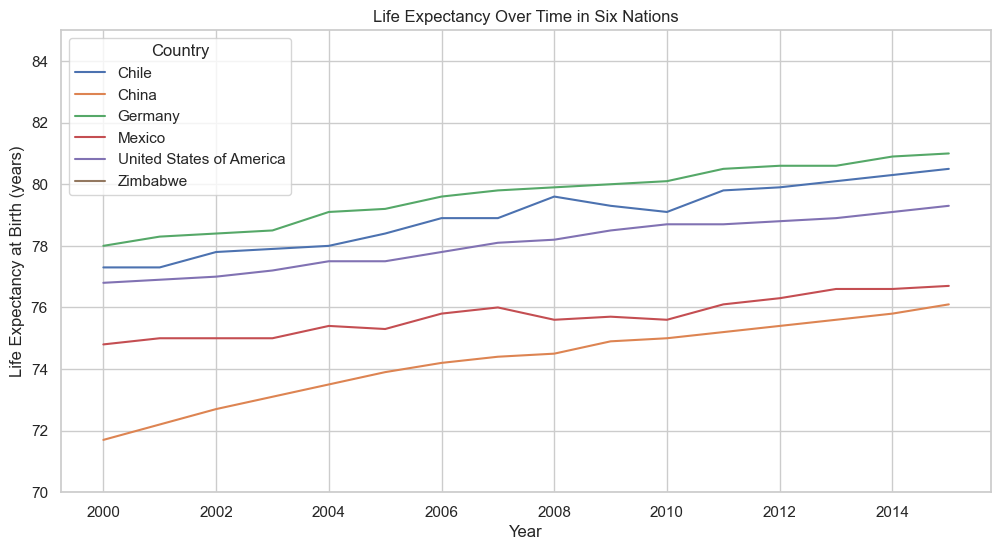

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for the plots
sns.set(style="whitegrid")

# Line chart to show the trend of life expectancy over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='LEABY', hue='Country', data=data)
plt.title('Life Expectancy Over Time in Six Nations')
plt.ylabel('Life Expectancy at Birth (years)')
plt.xlabel('Year')
plt.ylim(70, 85)  
plt.show()


### Interpretation of the Life Expectancy Trends

The line chart shows that life expectancy has generally increased over time in all six nations from 2000 to 2015. 

- **Germany, the United States, and Chile** show the highest life expectancy, consistently above 78 years.
- **Mexico and China** have moderate increases in life expectancy, starting in the mid-70s and rising steadily.
- **Zimbabwe** starts at a much lower life expectancy (around 50 years) but shows significant improvement over the years.

This overall positive trend suggests improvements in public health across these countries during the period.


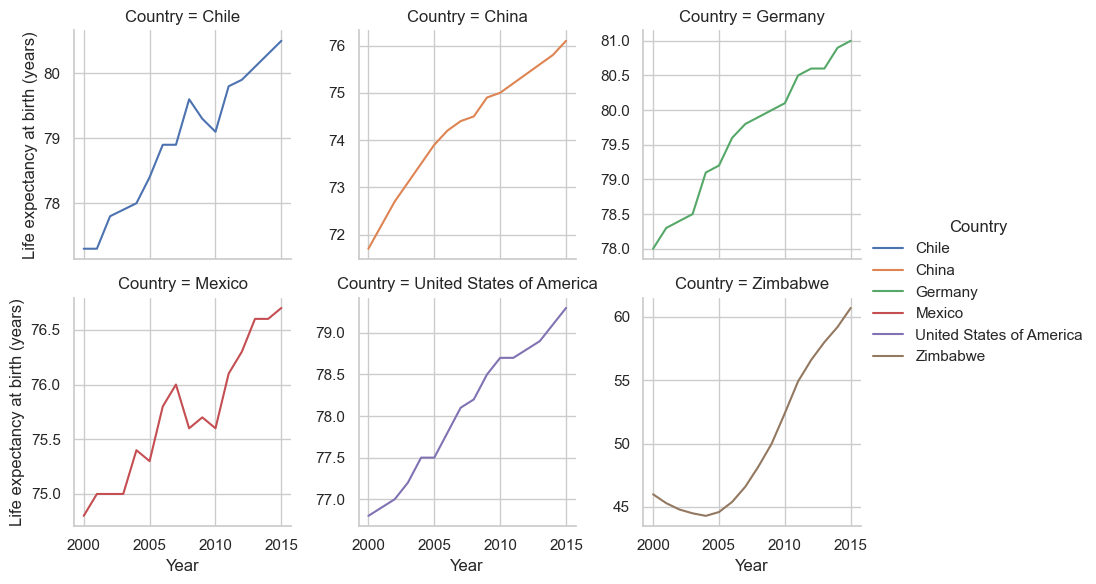

In [6]:
graphLEABY = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

### Interpretation of the Faceted Line Plots

The faceted line plots provide a detailed view of life expectancy trends over time for each of the six nations:

- **Chile** and **Germany** show a steady increase in life expectancy, with both reaching over 80 years by 2015.
- **China** and **United States** also exhibit consistent growth, with life expectancy nearing 76 and 79 years respectively.
- **Mexico** has fluctuations but shows an overall upward trend.
- **Zimbabwe** starts with a significantly lower life expectancy but experiences remarkable growth after 2005, reaching nearly 60 years by 2015.

These plots highlight the varying rates of improvement in life expectancy across the countries.


After plotting these graphs, we can now confirm that life expectancy has increased over time in all six nations. Countries like Germany, Chile, and the United States have consistently high life expectancy levels, exceeding 79 years by 2015. China and Mexico also show steady improvements, though with minor fluctuations. Zimbabwe, which started with a significantly lower life expectancy, has shown remarkable progress, particularly after 2005, reflecting substantial advancements in public health during the period studied.


### Has GDP Increased Over Time in the Six Nations?

To determine if GDP has increased over time in the six nations, we can use the following visualizations:

1. **Line Charts**: Line charts are ideal for showing trends over time. By plotting GDP against time for each country, we can observe changes in GDP over the years.

2. **Swarm Plots**: Swarm plots provide insight into the distribution of GDP values across different countries over time. They are particularly useful for visualizing the density of data points, highlighting where values are concentrated.

These plots together offer a comprehensive view of GDP trends.


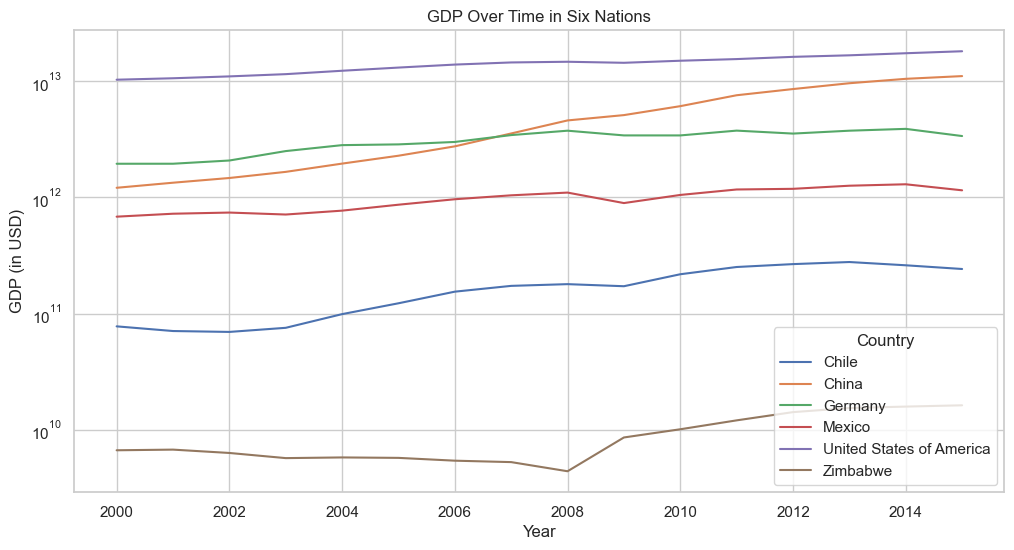

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for the plots
sns.set(style="whitegrid")

# Line chart to show the trend of GDP over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP', hue='Country', data=data)
plt.title('GDP Over Time in Six Nations')
plt.ylabel('GDP (in USD)')
plt.xlabel('Year')
plt.yscale('log') 
plt.show()


### Interpretation of GDP Over Time in Six Nations

The line chart shows that GDP has generally increased over time in all six nations:

- **United States** consistently has the highest GDP, showing steady growth throughout the period.
- **China** exhibits rapid growth, especially after 2005, closing the gap with the United States.
- **Germany**, **Mexico**, and **Chile** show moderate, stable increases in GDP.
- **Zimbabwe** starts with a very low GDP, experiencing fluctuations, but shows some recovery towards the end of the period.

These trends indicate varying rates of economic growth across the countries.

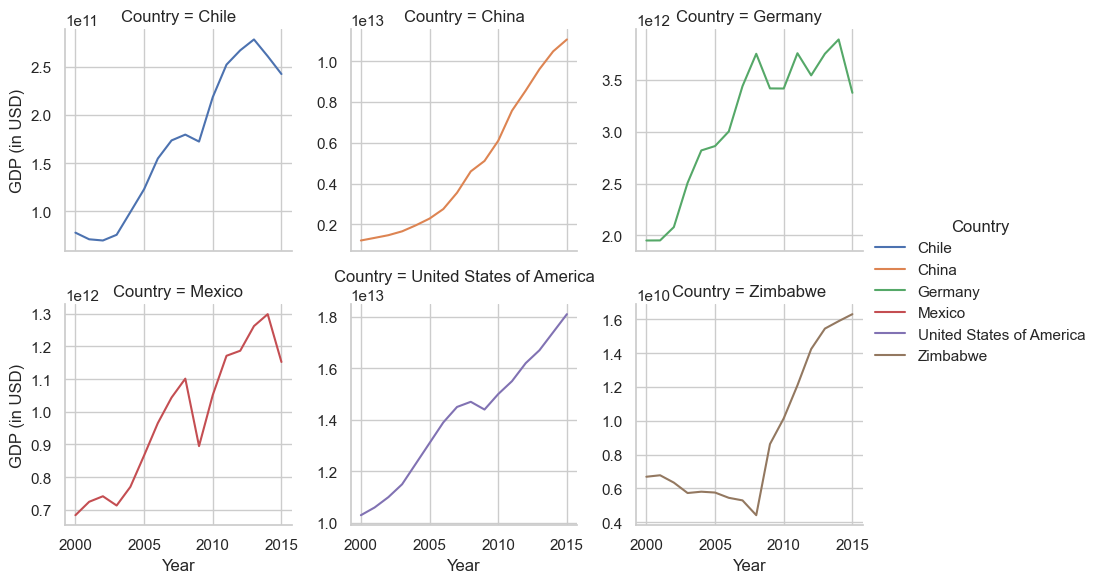

In [8]:
import seaborn as sns

# Faceted line charts for GDP by country
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3, hue="Country", sharey=False)

graphGDP = (
    graphGDP.map(sns.lineplot, "Year", "GDP")
    .add_legend()
    .set_axis_labels("Year", "GDP (in USD)")
)

graphGDP;



### Interpretation of GDP Faceted Line Charts

The faceted line charts provide a detailed view of GDP trends for each of the six countries over time.

- **United States**: Shows a steady and significant increase in GDP, maintaining the highest values among all countries.
- **China**: Exhibits rapid growth, especially post-2005, reflecting its fast-paced economic development.
- **Germany**: Displays moderate growth with some fluctuations.
- **Mexico and Chile**: Both show upward trends, with Mexico experiencing a more consistent increase.
- **Zimbabwe**: Despite having the lowest GDP, Zimbabwe shows some growth after a dip around 2005.

These charts effectively highlight the varying economic trajectories of the countries, with significant growth in China and the United States, moderate increases in Germany and Mexico, and a slower pace in Chile and Zimbabwe.


### Is there a correlation between GDP and life expectancy of a country?

To determine if there is a correlation between GDP and life expectancy in the six nations, we can use the following visualizations:

1. **Violin Plot Overlaid with Swarm Plot**: These plots provide insight into the distribution and density of GDP and life expectancy values across different countries. The swarm plot highlights individual data points, while the violin plot shows the distribution shape.

2. **Scatter Plots**: Scatter plots will directly visualize the relationship between GDP and life expectancy for each country, allowing us to observe potential correlations.

3. **Correlation Matrices and Coefficients**: These will provide a numerical summary of the strength and direction of the relationship between GDP and life expectancy, offering a more precise analysis of the correlation.

These visualizations together will help assess the correlation between GDP and life expectancy.



C:\Users\adrco\Projects\Data Science\Life_Expectancy_and_GDP\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


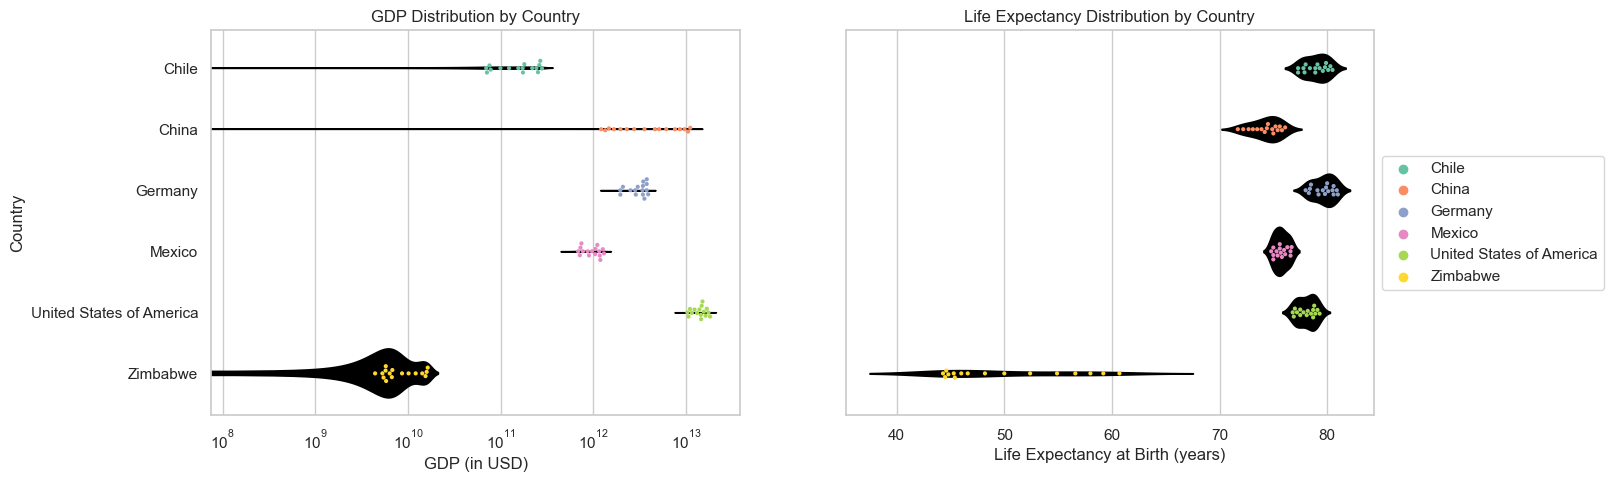

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for the plots
sns.set(style="whitegrid")

# Create subplots for GDP and Life Expectancy
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

# Violin plot overlaid with swarm plot for GDP
sns.violinplot(ax=axes[0], x=data.GDP, y=data.Country, color="black", inner=None)
sns.swarmplot(ax=axes[0], x=data.GDP, y=data.Country, hue=data.Country, palette="Set2", size=3, legend=False)
axes[0].set_xlabel("GDP (in USD)")
axes[0].set_xscale('log')
axes[0].set_title("GDP Distribution by Country")

# Violin plot overlaid with swarm plot for Life Expectancy
sns.violinplot(ax=axes[1], x=data.LEABY, y=data.Country, color="black", inner=None)
sns.swarmplot(ax=axes[1], x=data.LEABY, y=data.Country, hue=data.Country, palette="Set2", size=3, legend=False)
axes[1].set_xlabel("Life Expectancy at Birth (years)")
axes[1].set_title("Life Expectancy Distribution by Country")

# Manually add a legend
for color, label in zip(sns.color_palette("Set2"), data.Country.unique()):
    plt.scatter([], [], color=color, label=label)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()






### Interpretation of Violin and Swarm Plots for GDP and Life Expectancy

The violin plots overlaid with swarm plots provide insights into the distribution and density of GDP and life expectancy across the six nations:

- **GDP Distribution**: The United States shows the highest GDP with a wide distribution, while China, Germany, and Mexico also have relatively high GDPs. Chile and Zimbabwe have significantly lower GDPs, with Zimbabwe displaying the lowest values.

- **Life Expectancy Distribution**: Life expectancy values are tightly clustered, with most countries showing high life expectancy around 75-80 years. Zimbabwe stands out with a much lower life expectancy.


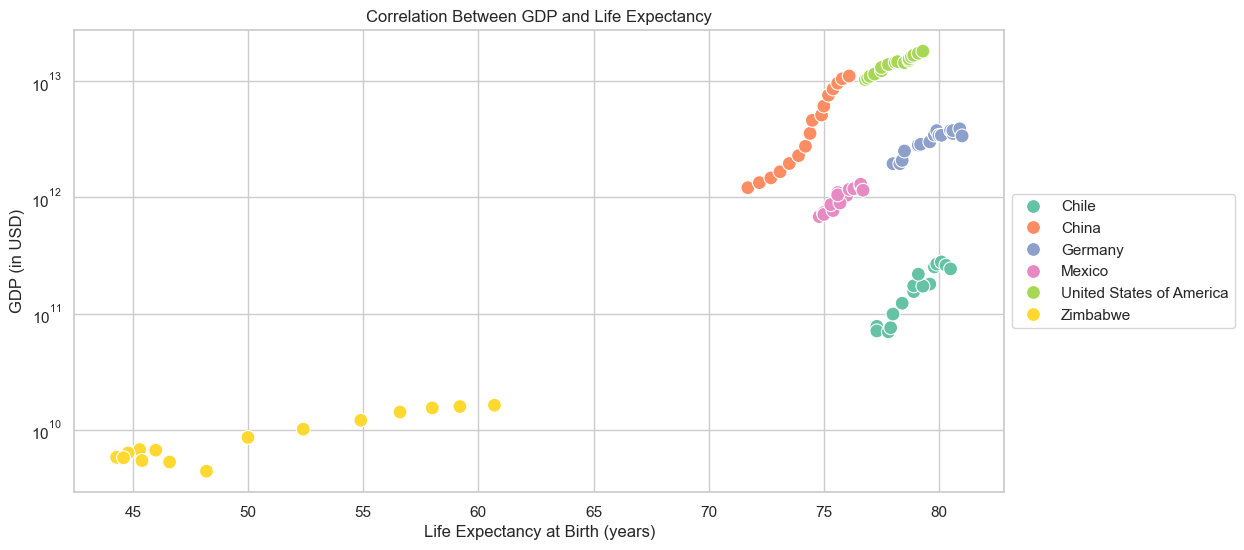

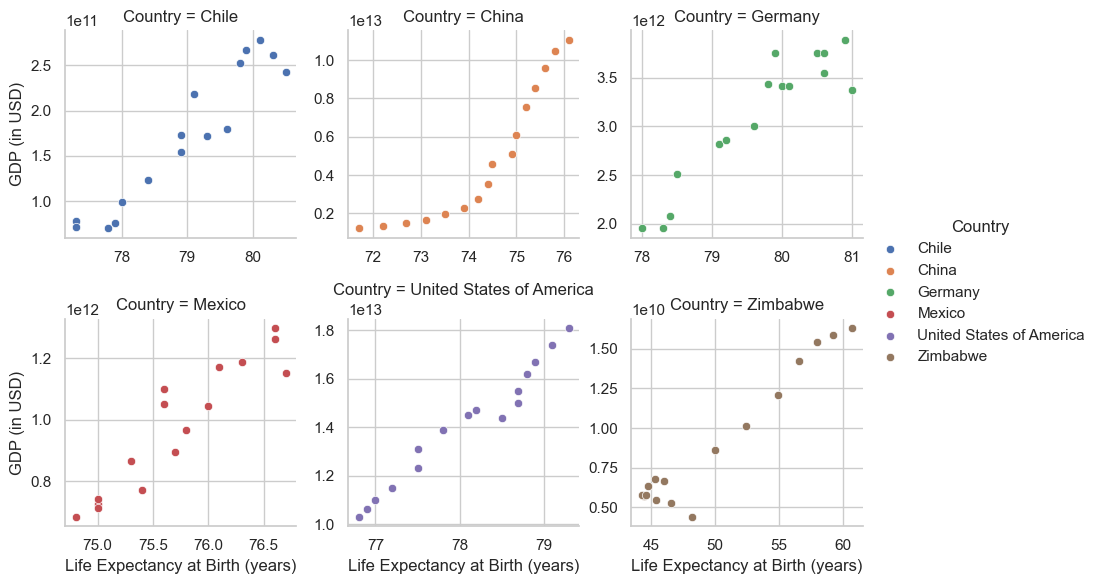

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for the plots
sns.set(style="whitegrid")

# Scatter plot to explore the relationship between GDP and life expectancy
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data.LEABY, y=data.GDP, hue=data.Country, palette="Set2", s=100)

# Add titles and labels
plt.title('Correlation Between GDP and Life Expectancy')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('GDP (in USD)')
plt.yscale('log')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plot
plt.show()

# FacetGrid to break out scatter plots by country
graph = sns.FacetGrid(data, col="Country", col_wrap=3, hue="Country", sharey=False, sharex=False)
graph = (graph.map(sns.scatterplot, "LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life Expectancy at Birth (years)", "GDP (in USD)"))

plt.show()


### Interpretation of Scatter Plots

The scatter plots provide a clear visualization of the relationship between GDP and life expectancy across the six countries:

- **GDP vs. Life Expectancy Correlation**:
  - **Chile, Germany, Mexico, and the United States**: These countries show a strong positive correlation, where an increase in GDP corresponds to an increase in life expectancy.
  - **China**: Exhibits an exponential relationship, with GDP rising sharply alongside life expectancy.
  - **Zimbabwe**: Shows a weaker correlation, with GDP fluctuating while life expectancy increases steadily.


            GDP     LEABY
GDP    1.000000  0.343207
LEABY  0.343207  1.000000


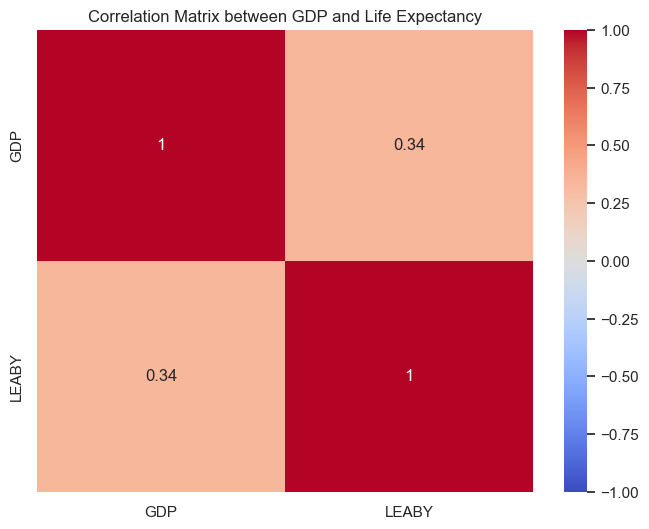

Pearson Correlation Coefficient between GDP and Life Expectancy: 0.34


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[['GDP', 'LEABY']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between GDP and Life Expectancy')
plt.show()

# Calculate Pearson correlation coefficient
pearson_corr = data[['GDP', 'LEABY']].corr(method='pearson').iloc[0, 1]
print(f'Pearson Correlation Coefficient between GDP and Life Expectancy: {pearson_corr:.2f}')


### Interpretation of the Correlation Matrix and Pearson Correlation Coefficient

The correlation matrix visualizes the relationship between GDP and Life Expectancy (LEABY). The matrix shows that the Pearson correlation coefficient between GDP and LEABY is 0.34. 

This coefficient indicates a moderate positive correlation, suggesting that as a country's GDP increases, its life expectancy tends to increase as well. However, the correlation is not very strong, implying that while GDP is a factor in life expectancy, other factors also play a significant role in determining life expectancy across these countries.


### What is the average life expectancy in the nations with strong correlation?

To determine the average life expectancy in the nations that show a strong correlation between GDP and life expectancy, we can use the following visualizations:

1. **Bar Plots**: Bar plots are ideal for displaying the average values of life expectancy in these specific countries. By focusing on the nations with a significant GDP-life expectancy correlation, we can gain insights into their public health outcomes.

This visualization will provide a clear comparison of the average life expectancy in the strongly correlated nations.


C:\Users\adrco\AppData\Local\Temp\ipykernel_6292\3021737623.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LEABY', y='Country', data=strong_corr_countries, palette="Set2")


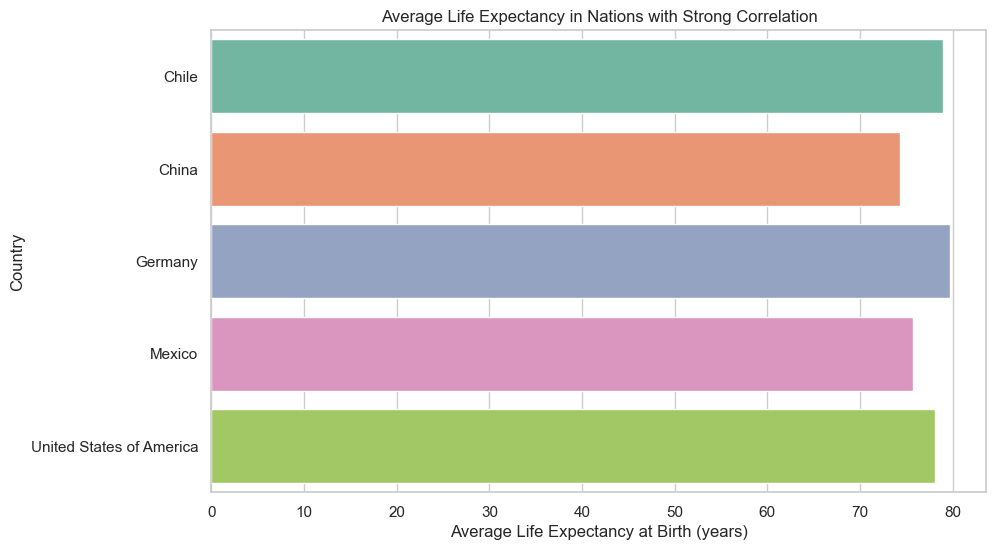

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only the countries with strong correlation
strong_corr_countries = dfMeans[dfMeans['Country'].isin(['Chile', 'Germany', 'Mexico', 'China', 'United States of America'])]

# Create the bar plot for average life expectancy (LEABY)
plt.figure(figsize=(10, 6))
sns.barplot(x='LEABY', y='Country', data=strong_corr_countries, palette="Set2")
plt.title('Average Life Expectancy in Nations with Strong Correlation')
plt.xlabel('Average Life Expectancy at Birth (years)')
plt.ylabel('Country')
plt.show()


### Interpretation of Average Life Expectancy in Nations with Strong Correlation

The bar plot shows the average life expectancy at birth in countries with a strong correlation between GDP and life expectancy: Chile, China, Germany, Mexico, and the United States.

- All these nations have relatively high average life expectancies, ranging from around 74 years (China) to nearly 80 years (Germany).
- Germany has the highest average life expectancy, followed closely by Chile and the United States.
- These findings suggest that higher economic development, as indicated by GDP, is generally associated with higher life expectancy.


### What is the distribution of life expectancy in the countries with strong correlation?

To understand the distribution of life expectancy in the countries that showed a strong correlation between GDP and life expectancy, we can use the following visualizations:

1. **Histograms**: Histograms are useful for visualizing the distribution of data points. By plotting the life expectancy values, we can observe the frequency of different ranges of life expectancy and detect any skewness.

2. **Kernel Density Estimates (KDE)**: KDE plots provide a smoothed visualization of the data distribution, allowing us to observe the overall shape of the distribution and identify the presence of skewness.

These visualizations will help us analyze the distribution and determine if it exhibits left skewness, where most observations are concentrated on the right side of the distribution.


C:\Users\adrco\AppData\Local\Temp\ipykernel_6292\566909637.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.LEABY, shade=True, ax=axes[1])


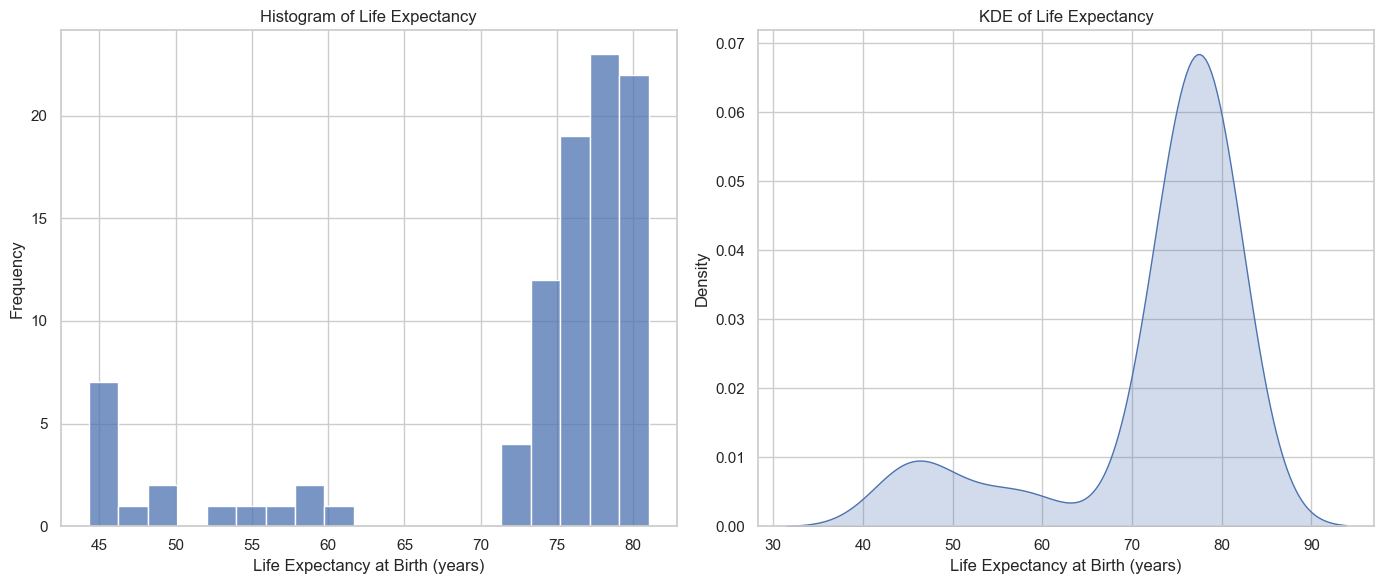

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots: one for histogram and one for KDE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for life expectancy
sns.histplot(data.LEABY, kde=False, ax=axes[0])
axes[0].set_title("Histogram of Life Expectancy")
axes[0].set_xlabel("Life Expectancy at Birth (years)")
axes[0].set_ylabel("Frequency")

# KDE for life expectancy
sns.kdeplot(data.LEABY, shade=True, ax=axes[1])
axes[1].set_title("KDE of Life Expectancy")
axes[1].set_xlabel("Life Expectancy at Birth (years)")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


### Interpretation of Life Expectancy Distribution

The histogram and KDE plot both provide a clear visualization of the distribution of life expectancy at birth across the countries.

- **Histogram**: The histogram shows a noticeable left skew in the distribution of life expectancy. The majority of the life expectancy values are clustered on the higher end, around 70 to 80 years. There is also a distinct smaller peak around 45 to 50 years, likely representing the lower life expectancy values for Zimbabwe.

- **KDE Plot**: The KDE plot confirms the left skew observed in the histogram, with a prominent peak around 75 to 80 years, indicating that most countries have a life expectancy within this range. The smaller peak on the left side of the plot suggests a minority of countries with significantly lower life expectancy.

Together, these visualizations demonstrate that while most countries have a relatively high life expectancy, there is a minority with much lower values, leading to a left-skewed distribution.


## Conclusion

---

1. **Has life expectancy increased over time in the six nations?**:
   - Yes, life expectancy has increased over time in all six nations. Zimbabwe showed the most significant improvement, particularly after 2005, while Germany, Chile, and the United States have consistently maintained high life expectancy levels. China and Mexico also demonstrated steady improvements with minor fluctuations.

   ---

2. **Has GDP increased over time in the six nations?**:
   - Yes, GDP has generally increased over time in all six nations. The United States and China exhibited the most significant GDP growth, with China experiencing a sharp rise throughout the period. Germany and Mexico showed moderate increases, while Chile exhibited steady growth. Zimbabwe's GDP, although the lowest among the nations, showed fluctuations with some increases over time.

   ---

3. **Is there a correlation between GDP and life expectancy of a country?**:
   - There is a positive correlation between GDP and life expectancy in several countries, particularly in Chile, Germany, Mexico, and the United States. These countries exhibit a strong correlation where an increase in GDP corresponds to an increase in life expectancy. China shows an exponential relationship between GDP and life expectancy. However, the overall correlation between GDP and life expectancy across all six nations is moderate, as indicated by a Pearson correlation coefficient of 0.34.

   ---

4. **What is the average life expectancy in these nations?**:
   - The average life expectancy is high for countries showing a strong correlation between GDP and life expectancy. Chile, Germany, Mexico, and the United States all have average life expectancies close to or above 78 years. China, while slightly lower, still shows an average life expectancy of around 74 years.

   ---

5. **What is the distribution of that life expectancy?**:
   - The life expectancy distribution is left-skewed, with most observations clustered between 70 and 80 years. This indicates that the majority of the population in these nations enjoys a relatively high life expectancy, though Zimbabwe's significantly lower life expectancy is a notable outlier.

